# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application
We will practice on how to do simple web scrapping using beautiful soup. Web scrapping is one of a method that we can use to collect data from the internet.
To do this we will use only some default library from python and BeautifulSoup.
With BeautifulSoup webscrapping is made easy and simple but you will need to have a little bit knowledge of html.

## Background

Scrapping is a good way to collect the data we don't have from public.
In this project we try to scrap USD to IDR exchange rate data from https://www.exchange-rates.org/ website. We will try to scrap this sites for educational purpose only.
Exchange-Rates.org allows you to check the latest foreign exchange rates. The data provided is up-to-date and supplied by the market-leading provider - Xignite.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [41]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get, Here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

In [40]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charse


Now we already have a tidier html, now we should search the lines that we want to use. Let's back to our web page first.

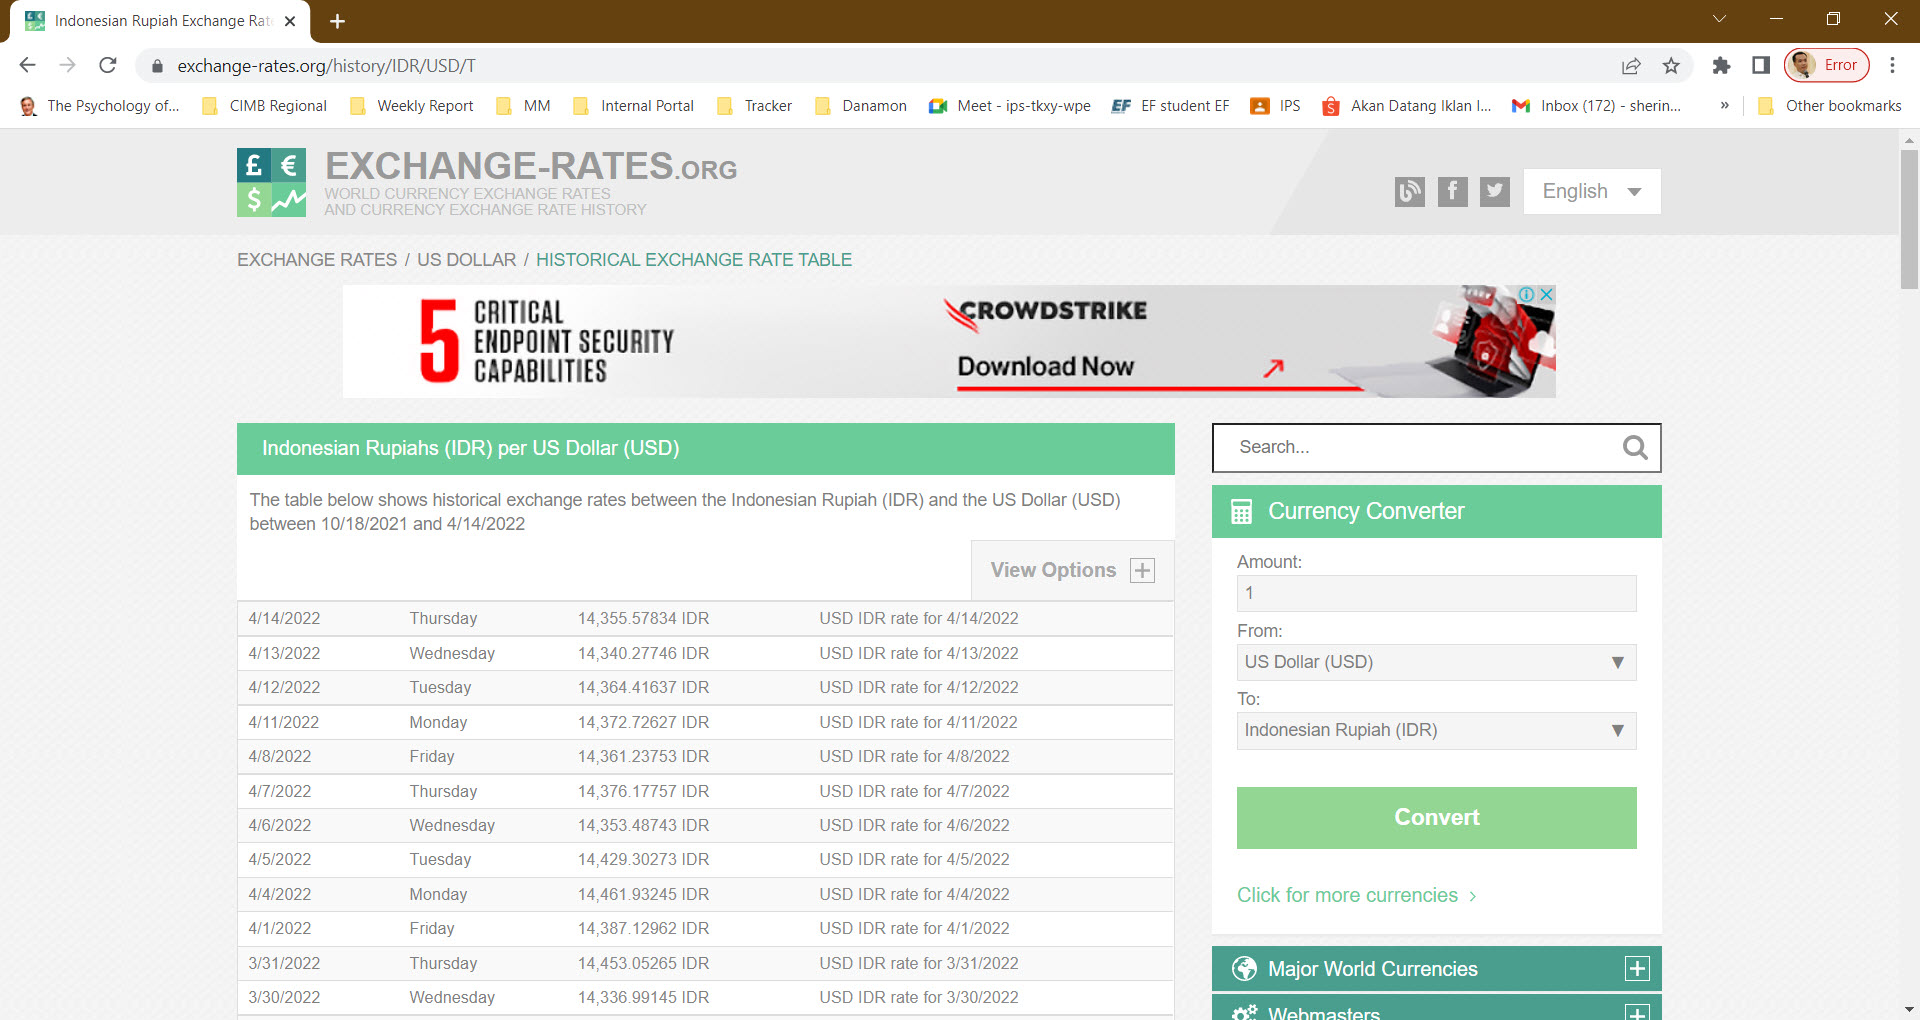

The information that we need are date and the exchange rate which contain in the table. To know which part of the code refer to that table, we can just move our cursor there, right click and inspect element. Then we will see something like below screen.

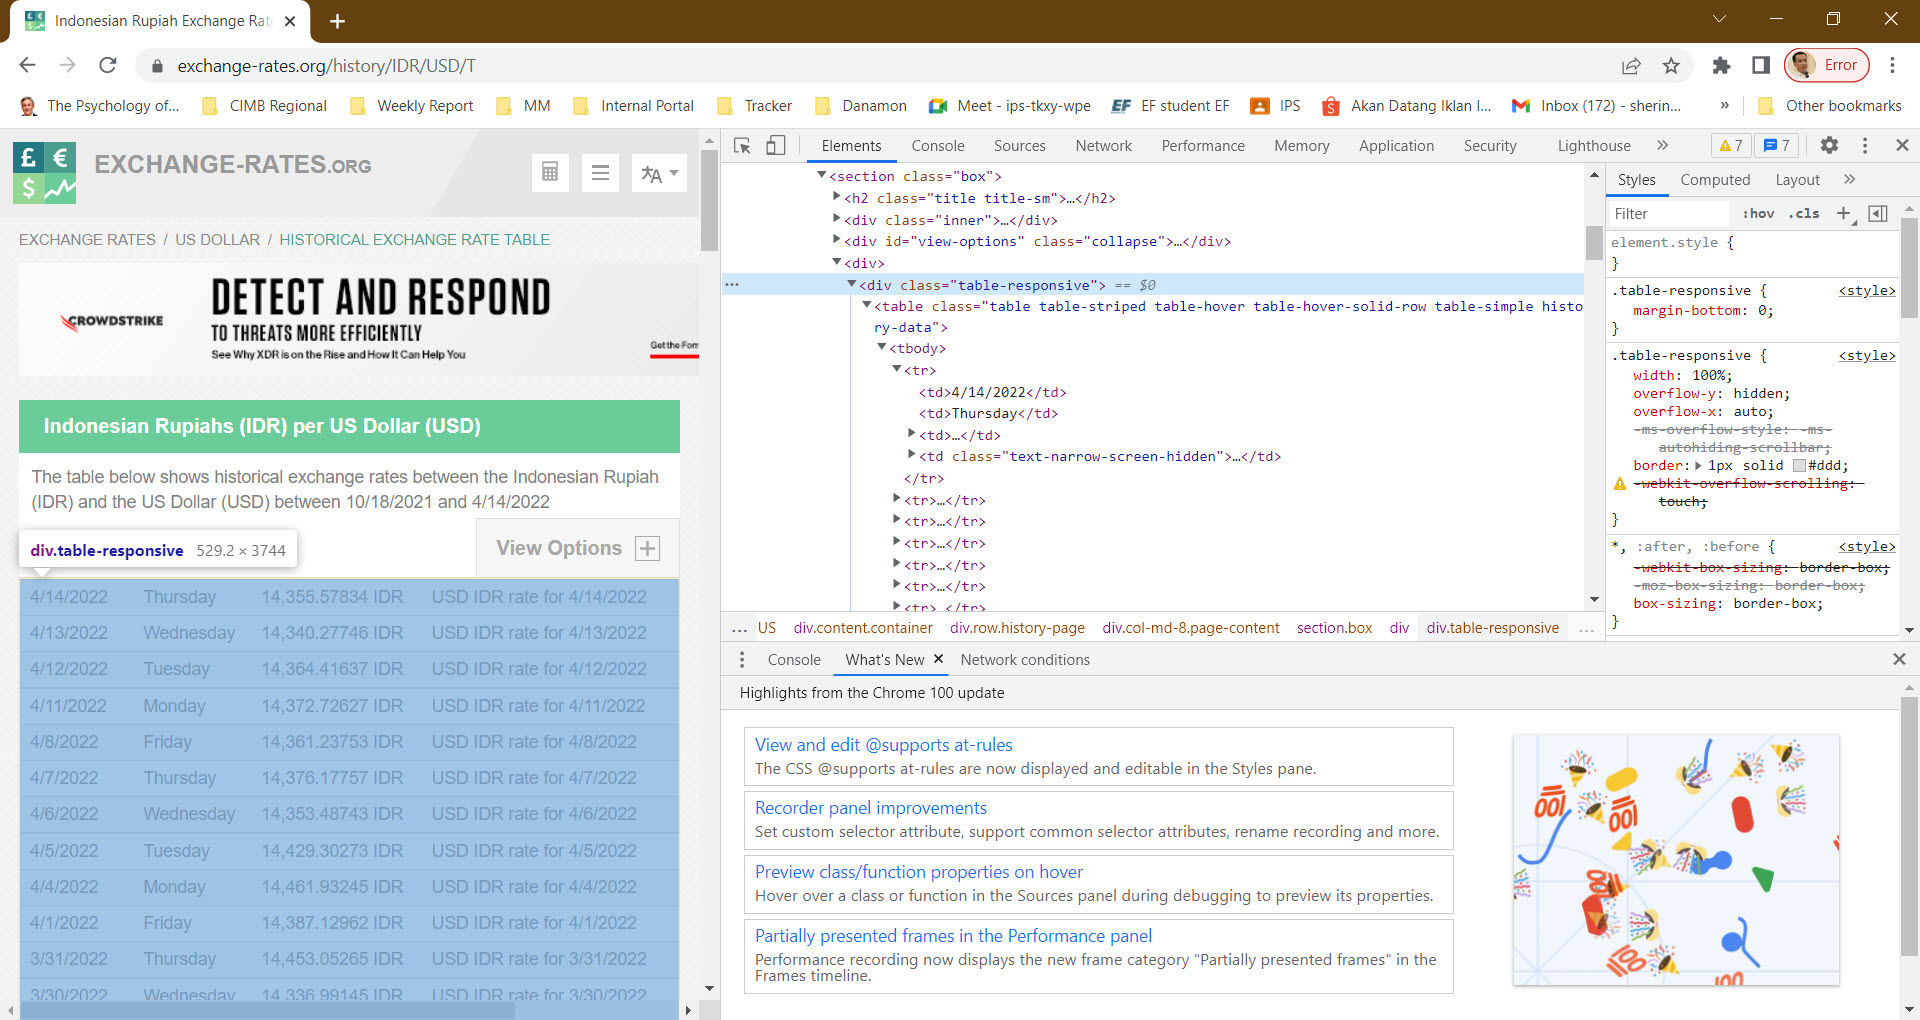

From inspect element we know that we need to find the line table with class `table-responsive`. We can use the `find` method at our beautifulsoup object. Let's also call our object to see what we get.

In [39]:
table = soup.find('div', attrs={'class':'table-responsive'})
print(table.prettify()[:500])

<div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     4/14/2022
    </td>
    <td>
     Thursday
    </td>
    <td>
     <a href="/Rate/USD/IDR/4-14-2022">
      14,355.57834
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/4-14-2022">
      USD IDR rate for 4/14/2022
     </a>
    </td>
   </tr>
   <tr>
    <td>
     4/13/2022
    </td>
   


As we can see from the line we just extract, we get all the content we needed. As for what is div, The `td` tag defines a column in the table in an HTML document. It is easily styled by using the class or id attribute, Any sort of content can be put inside the `td` tag. The `a` tag is used to create a hyperlink. 
The `find()` function can help you to get you the part of the html code that you needed.  

Now, we need to get 2 information, which are the period of time (date) and the exchange rate from USD to IDR. From above code we can see period is contained within the first `td` and exchange rate is contained within the first `a` in every row under `tr` tag. 

Now I will introduce you to other useful function from beautiful soup, that's `find_all`. While the `find` fuction method is used for finding out the **first tag** with the specified name or id and returning an object of type bs4. The find_all method is used for finding out **all tags** with the specified tag name or id and returning them as a list of type bs4.

For example I'll try to extract the first 10 data of information within the `td` tag in the html. You can use slicer to help you.

In [42]:
table.find_all('td')[:10]

[<td>4/14/2022</td>,
 <td>Thursday</td>,
 <td><a href="/Rate/USD/IDR/4-14-2022">14,355.57834</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/4-14-2022">USD IDR rate for 4/14/2022</a></td>,
 <td>4/13/2022</td>,
 <td>Wednesday</td>,
 <td><a href="/Rate/USD/IDR/4-13-2022">14,340.27746</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/4-13-2022">USD IDR rate for 4/13/2022</a></td>,
 <td>4/12/2022</td>,
 <td>Tuesday</td>]

As you can see get already get the necessary key to extract all needed data. To get the only text information you can add `.text`. Remember you need to only get one information before you use `.text` otherwise it will return error. Here is the example on how you use `.text`. 

In [44]:
table.find_all('td')[0].text

'4/14/2022'

### Extracting the Information

Now all the `beautiful soup` part is over. All left to do is doing some programming to extract all the data automaticly, you can do this manualy at this part but if your data too long I advice you use loop. I'll show you how to make looping for extracting the data, but before that let's check how long is our data to help our looping process. Since `find_all` will always return data in format list, we will use `len()` to check how long is our list.

In [45]:
row = table.find_all('td', attrs={'class':'text-narrow-screen-hidden'})
row_length = len(row)
row_length

129

Now we know the length of our data, now here what we will do for the looping process. 

Here what the looping do to scrap the information: 

- First we need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and it's a list. 
- Then we will make a loop from one until the the length of the table row, 
- which we will find all cell of the column one and two which contain period and the inflation rate. 
- Then we will append it to our tuple that we prepared before, 
- every one iteration we will scrap one line of the table.  

In [51]:
temp = [] #initiating a tuple

for i in range(0, row_length):
    
    #get date
    period = table.find_all('td')[i*4].text
    
    #get exchange rate
    rate = table.find_all('a')[i*2].text
    rate = rate.strip() #to remove excess white space
    
    temp.append((period,rate)) 
    
temp

[('4/14/2022', '14,355.57834'),
 ('4/13/2022', '14,340.27746'),
 ('4/12/2022', '14,364.41637'),
 ('4/11/2022', '14,372.72627'),
 ('4/8/2022', '14,361.23753'),
 ('4/7/2022', '14,376.17757'),
 ('4/6/2022', '14,353.48743'),
 ('4/5/2022', '14,429.30273'),
 ('4/4/2022', '14,461.93245'),
 ('4/1/2022', '14,387.12962'),
 ('3/31/2022', '14,453.05265'),
 ('3/30/2022', '14,336.99145'),
 ('3/29/2022', '14,361.15282'),
 ('3/28/2022', '14,357.41556'),
 ('3/25/2022', '14,336.41203'),
 ('3/24/2022', '14,344.22317'),
 ('3/23/2022', '14,342.49195'),
 ('3/22/2022', '14,316.28136'),
 ('3/21/2022', '14,334.33161'),
 ('3/18/2022', '14,317.32984'),
 ('3/17/2022', '14,201.08740'),
 ('3/16/2022', '14,287.09042'),
 ('3/15/2022', '14,327.65493'),
 ('3/14/2022', '14,369.24960'),
 ('3/11/2022', '14,298.14917'),
 ('3/10/2022', '14,272.77815'),
 ('3/9/2022', '14,220.21619'),
 ('3/8/2022', '14,404.96831'),
 ('3/7/2022', '14,415.73042'),
 ('3/4/2022', '14,441.31509'),
 ('3/3/2022', '14,372.46415'),
 ('3/2/2022', '14,3

That's the result we get. At this point we can input it to a pandas' DataFrame and do usual data analysis, but if you notice the original webpage give us reversed information. To do a further analysis let's reverse our list we can use `::-1` to do that. 

In [24]:
temp = temp[::-1]
temp

[('10/18/2021', '14,056.43762'),
 ('10/19/2021', '14,075.46229'),
 ('10/20/2021', '14,079.51380'),
 ('10/21/2021', '14,121.60389'),
 ('10/22/2021', '14,110.21079'),
 ('10/25/2021', '14,152.60477'),
 ('10/26/2021', '14,166.19588'),
 ('10/27/2021', '14,141.55342'),
 ('10/28/2021', '14,175.29082'),
 ('10/29/2021', '14,288.95452'),
 ('11/1/2021', '14,233.76847'),
 ('11/2/2021', '14,256.29202'),
 ('11/3/2021', '14,256.74541'),
 ('11/4/2021', '14,334.06331'),
 ('11/5/2021', '14,338.39761'),
 ('11/8/2021', '14,257.97264'),
 ('11/9/2021', '14,243.01887'),
 ('11/10/2021', '14,271.96265'),
 ('11/11/2021', '14,288.84762'),
 ('11/12/2021', '14,233.63534'),
 ('11/15/2021', '14,235.75523'),
 ('11/16/2021', '14,222.37140'),
 ('11/17/2021', '14,246.59228'),
 ('11/18/2021', '14,225.41528'),
 ('11/19/2021', '14,243.55587'),
 ('11/22/2021', '14,243.50566'),
 ('11/23/2021', '14,259.04525'),
 ('11/24/2021', '14,320.08606'),
 ('11/25/2021', '14,283.22294'),
 ('11/26/2021', '14,300.35336'),
 ('11/29/2021', '

Then after we fix our list a bit, as usual we will input it to pandas' dataframe.

## Creating data frame & Data wrangling

Put the array into dataframe

In [52]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period','rate'))
df.head()

,period,rate
0,4/14/2022,"14,355.57834"
1,4/13/2022,"14,340.27746"
2,4/12/2022,"14,364.41637"
3,4/11/2022,"14,372.72627"
4,4/8/2022,"14,361.23753"


Let's check our dataframe data types to see if our data is useable. 

In [53]:
df.dtypes

period    object
rate      object
dtype: object

Now we need to clean the data. We will change the period to `datetime` datatype, and the exchange rate to `float` datatype but before we can do that we need to remove the "," first. To do this we can use `str.replace()`.

In [54]:
df['period'] = df['period'].astype('datetime64')
df['rate'] = df['rate'].str.replace(",", "")
df['rate'] = df['rate'].astype('float64')

In [55]:
df.head()

,period,rate
0,2022-04-14,14355.57834
1,2022-04-13,14340.27746
2,2022-04-12,14364.41637
3,2022-04-11,14372.72627
4,2022-04-08,14361.23753


In [56]:
df.dtypes

period    datetime64[ns]
rate             float64
dtype: object

To make our plot behave like we want, we need to set our index of our dataframe to our time coloumn. We can use `set_index()` 

In [57]:
df = df.set_index('period')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='period'>

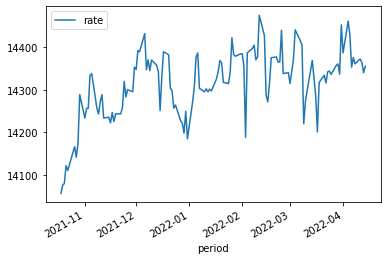

In [58]:
df.plot()

From the chart we can make some conclusion:
    
    - From October 2021 to April 2022 Indonesia Rupiah (IDR) gets stronger against United State Dollar (USD) about 2%
    - Starting from November 2021, Rupiah against US Dollar is moving in the range between 14200 and 14400

Now We already finish our web scrapping project. In conclusion when you don't have a direct access to a data from a website you can always do the scrapping method. There is a couple library that can do same task like `scrapy` that can build bot to automaticly crawl data, but we choose beautiful soup since it's more beginner friendly and a helpful utility that allows a programmer to get specific elements out of a webpage (for example, a list of images). 
I hope this short module help you to understand and can kickstart you to learn more about webscrapping using Beautifulsoup.

Happy learning~

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.